<a href="https://colab.research.google.com/github/MuhammadIlham202310021/UTS-Machine-Learning/blob/main/UTS_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

url = 'https://raw.githubusercontent.com/isnanmulia/lecture-datasets/main/mobileprice_modified.csv'
df = pd.read_csv(url)

## 1) Mengidentifikasi nama dan jenis atribut dari seluruh atribut prediktor dan seluruh atribut label yang terdapat pada dataset tersebut. Jika ada atribut yang berjenis kategorik, sebutkan nilai unik yang terdapat pada atribut tersebut.

In [3]:
df.info()

categorical_attributes = []

for column in df.columns:
    if len(df[column].unique()) <= 2:
        categorical_attributes.append(column)

print("Atribut Kategorik:")
print(categorical_attributes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1990 non-null   float64
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     1990 non-null   float64
 7   m_dep          2000 non-null   float64
 8   mobile_wt      1990 non-null   float64
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            1990 non-null   float64
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [4]:
unique_values_blue = df['blue'].value_counts()
unique_values_dual_sim = df['dual_sim'].value_counts()
unique_values_four_g = df['four_g'].value_counts()
unique_values_three_g = df['three_g'].value_counts()
unique_values_touch_screen = df['touch_screen'].value_counts()
unique_values_wifi = df['wifi'].value_counts()

print("Unique values in 'blue' attribute:")
print(unique_values_blue)

print("\nUnique values in 'dual_sim' attribute:")
print(unique_values_dual_sim)

print("\nUnique values in 'four_g' attribute:")
print(unique_values_four_g)

print("\nUnique values in 'three_g' attribute:")
print(unique_values_three_g)

print("\nUnique values in 'touch_screen' attribute:")
print(unique_values_touch_screen)

print("\nUnique values in 'wifi' attribute:")
print(unique_values_wifi)


Unique values in 'blue' attribute:
0    1010
1     990
Name: blue, dtype: int64

Unique values in 'dual_sim' attribute:
1    1019
0     981
Name: dual_sim, dtype: int64

Unique values in 'four_g' attribute:
1    1043
0     957
Name: four_g, dtype: int64

Unique values in 'three_g' attribute:
1    1523
0     477
Name: three_g, dtype: int64

Unique values in 'touch_screen' attribute:
1    1006
0     994
Name: touch_screen, dtype: int64

Unique values in 'wifi' attribute:
1    1014
0     986
Name: wifi, dtype: int64


---
## 2. Melakukan Pra-proses data. Detail untuk pengerjaan praproses data adalah sebagai berikut.

 a.   Pisahkan bagian atribut prediktor dengan label data menjadi 2 variabel terpisah.

In [7]:
# Pisahkan atribut prediktor (fitur) dan atribut label
X = df.drop("price_range", axis=1)
y = df["price_range"]


b. Gunakan SimpleImputer untuk menangani missing values, dengan nilai median dari atribut data sebagai strategi pengisian nilai

In [8]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

c. Terapkan MinMaxScaler atau StandardScaler untuk mengubah nilai atribut prdeiktor, agar nilai dari masing-masing atribut menjadi seragam

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X_imputed)

d. Tampilkan statistik deskriptif dari atribut data sebelum dan setelah dilakukan pengisian missing values dan standarisasi

In [10]:
# Statistik deskriptif sebelum pengisian missing values
before_imputation_stats = X.describe()

# Statistik deskriptif setelah pengisian missing values (sebelum standarisasi)
after_imputation_stats = pd.DataFrame(X_imputed, columns=X.columns).describe()

print("Statistik Deskriptif Sebelum Pengisian Missing Values:")
print(before_imputation_stats)

print("\nStatistik Deskriptif Setelah Pengisian Missing Values (Sebelum Standarisasi):")
print(after_imputation_stats)

Statistik Deskriptif Sebelum Pengisian Missing Values:
       battery_power       blue  clock_speed     dual_sim           fc  \
count    1990.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1237.867839     0.4950     1.522250     0.509500     4.309500   
std       439.676025     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       850.250000     0.0000     0.700000     0.000000     1.000000   
50%      1225.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.000000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  \
count  2000.000000  1990.000000  2000.000000  1990.000000  2000.000000   
mean      0.521500    31.987940     0.501750   140.344221     4.520500   
std       0.499662    18.136427     0.288416    35.40711

In [11]:
# Statistik deskriptif setelah standarisasi
after_scaling_stats = pd.DataFrame(X_scaled, columns=X.columns).describe()

print("\nStatistik Deskriptif Setelah Standarisasi:")
print(after_scaling_stats)


Statistik Deskriptif Setelah Standarisasi:
       battery_power          blue   clock_speed      dual_sim            fc  \
count   2.000000e+03  2.000000e+03  2.000000e+03  2.000000e+03  2.000000e+03   
mean    2.842171e-17 -1.243450e-17 -1.545430e-16  8.082424e-17  5.861978e-17   
std     1.000250e+00  1.000250e+00  1.000250e+00  1.000250e+00  1.000250e+00   
min    -1.680411e+00 -9.900495e-01 -1.253064e+00 -1.019184e+00 -9.928904e-01   
25%    -8.804636e-01 -9.900495e-01 -1.007906e+00 -1.019184e+00 -7.624947e-01   
50%    -2.920066e-02 -9.900495e-01 -2.727384e-02  9.811771e-01 -3.017032e-01   
75%     8.579829e-01  1.010051e+00  8.307794e-01  9.811771e-01  6.198797e-01   
max     1.733763e+00  1.010051e+00  1.811412e+00  9.811771e-01  3.384628e+00   

             four_g    int_memory         m_dep     mobile_wt       n_cores  \
count  2.000000e+03  2.000000e+03  2.000000e+03  2.000000e+03  2.000000e+03   
mean   1.048051e-16  3.197442e-17 -1.030287e-16  8.881784e-17 -7.727152e-17  

---
## 3. Membangun model klasifikasi berdasarkan dataset yang telah dilakukan praproses data. Detail untuk pengerjaan klasifikasi adalah sebagai berikut

a. Gunakan salah satu algoritma berikut untuk membangun model klasifikasi: KNN, Decision Tree, SVM (parameter yang digunakan boleh disesuaikan dengan bebas)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi model KNN: {accuracy}')

Akurasi model KNN: 0.515


b. Gunakan metode holdout untuk membagi keseluruhan dataset menjadi data training dan data testing, dengan proposi 80% data training dan 20% data testing

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

c. Tampilkan confusion matrix dan akurasi model klasifikasi

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Melakukan prediksi pada data pengujian
y_pred = knn.predict(X_test)  # 'knn' adalah model KNN yang telah kita latih

# Menghitung matriks kebingungan
confusion = confusion_matrix(y_test, y_pred)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:")
print(confusion)
print(f'Akurasi model klasifikasi: {accuracy}')

Confusion Matrix:
[[74 24  6  1]
 [25 37 24  5]
 [ 6 40 35 11]
 [ 2 11 39 60]]
Akurasi model klasifikasi: 0.515


---
## 4. Membangun model clustering berdasarkan dataset yang telah dilakukan praproses data, jika memungkinkan. Detail untuk pengerjaan Clustering adalah sebagai berikut.


a. Gunakan salah satu algoritma berikut untuk melakukan clustering: K-Means, DBSCAN, Agglomerative clustering (parameter yang digunakan boleh disesuaikan dengan bebas)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


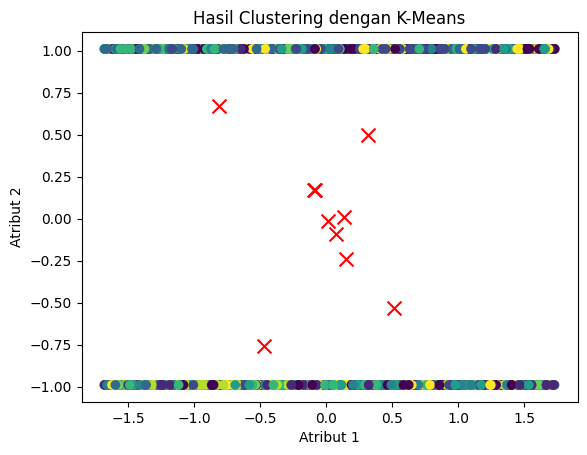

In [20]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X_scaled)
cluster_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

# Membuat scatter plot
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_labels, cmap='viridis')

# Menambahkan centroid cluster ke dalam plot
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=100)

plt.xlabel('Atribut 1')
plt.ylabel('Atribut 2')
plt.title('Hasil Clustering dengan K-Means')
plt.show()

b. Tampilkan silhoutte score dari model clustering

In [21]:
from sklearn.metrics import silhouette_score

# Hitung Silhouette Score
silhouette_avg = silhouette_score(X_scaled, cluster_labels)

print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.04512721896777574
